In [14]:
import requests
from datetime import datetime, timedelta
import json
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
simulationsdaten_json = '''
{
  "data": [
    {
      "from": "2024-05-18T08:00",
      "to": "2024-05-18T10:00",
      "batteryLevel": 0.2
    },
    {
      "from": "2024-05-19T09:00",
      "to": "2024-05-19T16:00",
      "batteryLevel": 0.2
    },
    {
      "from": "2024-05-20T08:30",
      "to": "2024-05-20T10:30",
      "batteryLevel": 0.2
    },
    {
      "from": "2024-05-21T07:00",
      "to": "2024-05-21T09:00",
      "batteryLevel": 0.19
    },
    {
      "from": "2024-05-22T08:00",
      "to": "2024-05-22T10:00",
      "batteryLevel": 0.18
    },
    {
      "from": "2024-05-23T08:00",
      "to": "2024-05-23T10:00",
      "batteryLevel": 0.2
    },
    {
      "from": "2024-05-24T09:00",
      "to": "2024-05-24T11:00",
      "batteryLevel": 0.22
    }
  ]
}

'''

In [10]:
simulationsdaten_json = '''
[
    {
        "carId": "car1",
        "data": [
            {
                "from": "2024-05-23T08:00",
                "to": "2024-05-23T10:00",
                "batteryLevel": 0.2
            },
            {
                "from": "2024-05-24T09:00",
                "to": "2024-05-24T16:00",
                "batteryLevel": 0.2
            },
            {
                "from": "2024-05-25T08:30",
                "to": "2024-05-25T10:30",
                "batteryLevel": 0.2
            },
            {
                "from": "2024-05-26T07:00",
                "to": "2024-05-26T09:00",
                "batteryLevel": 0.19
            },
            {
                "from": "2024-05-27T08:00",
                "to": "2024-05-27T10:00",
                "batteryLevel": 0.18
            },
            {
                "from": "2024-05-28T08:00",
                "to": "2024-05-28T10:00",
                "batteryLevel": 0.2
            },
            {
                "from": "2024-05-29T09:00",
                "to": "2024-05-29T11:00",
                "batteryLevel": 0.22
            }
        ]
    },
    {
        "carId": "car2",
        "data": [
            {
                "from": "2024-05-23T10:00",
                "to": "2024-05-23T14:00",
                "batteryLevel": 0.5
            },
            {
                "from": "2024-05-24T08:00",
                "to": "2024-05-24T12:00",
                "batteryLevel": 0.7
            },
            {
                "from": "2024-05-25T12:00",
                "to": "2024-05-25T17:00",
                "batteryLevel": 0.65
            },
            {
                "from": "2024-05-26T09:00",
                "to": "2024-05-26T12:00",
                "batteryLevel": 0.9
            },
            {
                "from": "2024-05-27T12:00",
                "to": "2024-05-27T18:00",
                "batteryLevel": 0.6
            },
            {
                "from": "2024-05-28T10:00",
                "to": "2024-05-28T14:00",
                "batteryLevel": 0.4
            },
            {
                "from": "2024-05-29T08:00",
                "to": "2024-05-29T16:00",
                "batteryLevel": 0.85
            }
        ]
    }
]
'''

In [11]:
autos_json = '''
[
    {
      "id": "car1",
      "name": "Auto1",
      "hybrid": false,
      "batteryLevel": 0.5,
      "batteryCapacity": 62,
      "chargeLimit": 1,
      "maxChargeSpeed": 22,
      "currentlyCharging": false,
      "currentChargingSpeed": 0,
      "currentSolarChargingSpeed": 0,
      "currentGridChargingSpeed": 0
    },
    {
      "id": "car2",
      "name": "Auto2",
      "hybrid": false,
      "batteryLevel": 0.8,
      "batteryCapacity": 50,
      "chargeLimit": 1,
      "maxChargeSpeed": 20,
      "currentlyCharging": false,
      "currentChargingSpeed": 0,
      "currentSolarChargingSpeed": 0,
      "currentGridChargingSpeed": 0
    }

]
'''

In [12]:
einstellungen_json = '''
{
  "numberOfSolarModules": 10,
  "powerPerModule": 300,
  "surface" : 30,
  "location": {
    "latitude": 48.0930902,
    "longitude": 11.4657764
  }
}
'''

In [15]:
simulationsdaten = json.loads(simulationsdaten_json)
autos = json.loads(autos_json)
einstellungen = json.loads(einstellungen_json)

In [22]:
def get_solar_forecast(lat, lon):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=direct_radiation"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        forecast = []
        for i, hour in enumerate(data['hourly']['time']):
            forecast.append({
                "dateAndTime": hour,
                "solarRadiation": abs(data['hourly']['direct_radiation'][i])  # Strahlung in W/m²
            })
        return forecast
    else:
        print(f"Error fetching data: {response.status_code, response}")
        return []


In [23]:
latitude = einstellungen["location"]["latitude"]
longitude = einstellungen["location"]["longitude"]
solar_forecast = get_solar_forecast(latitude, longitude)

In [19]:
def calculate_solar_power(solar_radiation, einstellungen):
    return solar_radiation * einstellungen["surface"] / 1000 * 0.65

In [24]:
print(json.dumps(solar_forecast, indent=2, default=str))

[
  {
    "dateAndTime": "2024-05-27T00:00",
    "solarRadiation": 0.0
  },
  {
    "dateAndTime": "2024-05-27T01:00",
    "solarRadiation": 0.0
  },
  {
    "dateAndTime": "2024-05-27T02:00",
    "solarRadiation": 0.0
  },
  {
    "dateAndTime": "2024-05-27T03:00",
    "solarRadiation": 0.0
  },
  {
    "dateAndTime": "2024-05-27T04:00",
    "solarRadiation": 0.0
  },
  {
    "dateAndTime": "2024-05-27T05:00",
    "solarRadiation": 1.0
  },
  {
    "dateAndTime": "2024-05-27T06:00",
    "solarRadiation": 11.0
  },
  {
    "dateAndTime": "2024-05-27T07:00",
    "solarRadiation": 131.0
  },
  {
    "dateAndTime": "2024-05-27T08:00",
    "solarRadiation": 249.0
  },
  {
    "dateAndTime": "2024-05-27T09:00",
    "solarRadiation": 211.0
  },
  {
    "dateAndTime": "2024-05-27T10:00",
    "solarRadiation": 245.0
  },
  {
    "dateAndTime": "2024-05-27T11:00",
    "solarRadiation": 46.0
  },
  {
    "dateAndTime": "2024-05-27T12:00",
    "solarRadiation": 164.0
  },
  {
    "dateAndTime": "

In [10]:
def create_simple_charging_plan(sim_data, solar_forecast, cars, settings):
    returnData = {
        "solarPowerUsed_per": None,
        "solarForecast": None,
        "gridPowerUsed_kwh": 0,
        "solarPowerUsed_kwh": 0,
        "chargeForecast": [],
    }
    # Erstellen eines Array welches fuer jede Stude die prognostizierte Solar-Leistung enthaelt
    solarEnergyForecast = []
    for forecast in solar_forecast:
        solarEnergyForecast.append([forecast["dateAndTime"], calculate_solar_power(forecast["solarRadiation"], settings)])
    
    returnData["solarForecast"] = list(map((lambda x: {"date": x[0], "speed_kwh": x[1]}), solarEnergyForecast))
    
    #Summe der prognositizierten Solar - Produktion
    sumSolarTotal = sum(item[1] for item in solarEnergyForecast)
    
     # fuer jedes Auto
    for car in cars:
        # fuer die entsprechenden Simulationsdaten des Autos
        for car_sim in sim_data:
            if(car_sim["carId"] == car["id"]):
                # Aufbau chargingPlan [[Datum und Uhrzeit, Speed Solar, Speed Grid, Battery LvL kwh, Battery Lvl % ],...]
                chargingPlan = list(map((lambda x: [x[0], None, None, None, None]), solarEnergyForecast))
                chargeTimeStart = datetime.strptime(solarEnergyForecast[0][0], '%Y-%m-%dT%H:%M')
                batteryLevel_kwh = car["batteryCapacity"] * car["chargeLimit"] * car["batteryLevel"]
                batteryLevel_per = batteryLevel_kwh / car["batteryCapacity"]
                energyNeeded = car["batteryCapacity"] * car["chargeLimit"] - batteryLevel_kwh
                
                print(energyNeeded)
                
                # fuer jeden Abwesendheits-Slot
                for sim in car_sim["data"]:
                    arrival = datetime.strptime(sim["to"], '%Y-%m-%dT%H:%M')
                    departure = datetime.strptime(sim["from"], '%Y-%m-%dT%H:%M')
                    duration_hours = (departure - chargeTimeStart).total_seconds() / 3600
                    total_solar_power = 0
                    total_grid_power = 0 
                    
                    for i, eForecast in enumerate(solarEnergyForecast):
                        if chargeTimeStart <= datetime.strptime(eForecast[0], '%Y-%m-%dT%H:%M') < departure:
                            maxCharging = car["maxChargeSpeed"]
                            if(energyNeeded >= maxCharging):
                                solarConsume = min(maxCharging, eForecast[1])
                                gridConsume = maxCharging - solarConsume
                            else:
                                solarConsume = min(energyNeeded, eForecast[1])
                                gridConsume = energyNeeded - solarConsume
                            
                           
                            eForecast[1] -= solarConsume # genutzte Solarleistung abziehen
                            energyNeeded -= (solarConsume + gridConsume)
                            chargingPlan[i][1] = solarConsume #solar Power
                            chargingPlan[i][2] = gridConsume #grid Power 
                            chargingPlan[i][3] = batteryLevel_kwh #battery level in kwh
                            chargingPlan[i][4] = batteryLevel_kwh / car["batteryCapacity"] # battery level in %
                            chargingPlan[i][1] = solarConsume
                            batteryLevel_kwh += solarConsume + gridConsume
                            returnData["solarPowerUsed_kwh"] += solarConsume
                            returnData["gridPowerUsed_kwh"] += gridConsume
                            
                        #zu der Zeit wo das Auto nicht da ist, ist sowohl solar als auch grid speed bei 0
                        elif departure <= datetime.strptime(eForecast[0], '%Y-%m-%dT%H:%M') < arrival:
                            chargingPlan[i][1] = None #solar power
                            chargingPlan[i][2] = None #grid power
                                       
                    chargeTimeStart = arrival
                    batteryLevel_kwh = car["batteryCapacity"] * sim["batteryLevel"]
                    batteryLevel_per = batteryLevel_kwh / car["batteryCapacity"]
                    energyNeeded = car["batteryCapacity"] * car["chargeLimit"] - batteryLevel_kwh
                    
        returnData["chargeForecast"].append({    
            "carId": car["id"],
            #"solarEnergyUse": solarEnergyUsed_per,
            "data": list(map((lambda x: {
                "date": x[0], 
                "chargingSpeedSolar": x[1], 
                "chargingSpeedGrid": x[2], 
                "batteryLevel_kwh": x[3], 
                "batteryLevel_per": x[4],
            }), chargingPlan))
        })
        
    solarEnergyUsed_per = returnData["solarPowerUsed_kwh"] / sumSolarTotal
    returnData["solarPowerUsed_per"] = solarEnergyUsed_per
    
    return returnData     
    

In [11]:
def create_smart_charging_plan(sim_data, solar_forecast, cars, settings):
    returnData = {
        "solarPowerUsed_per": None,
        "solarForecast": None,
        "gridPowerUsed_kwh": 0,
        "solarPowerUsed_kwh": 0,
        "chargeForecast": [],
    }
    # Erstellen eines Array welches fuer jede Stude die prognostizierte Solar-Leistung enthaelt
    solarEnergyForecast = []
    for forecast in solar_forecast:
        solarEnergyForecast.append([forecast["dateAndTime"], calculate_solar_power(forecast["solarRadiation"], settings)])
    
    returnData["solarForecast"] = list(map((lambda x: {"date": x[0], "speed_kwh": x[1]}), solarEnergyForecast))
    
    #Summe der prognositizierten Solar - Produktion
    sumSolarTotal = sum(item[1] for item in solarEnergyForecast)
    
    # fuer jedes Auto
    for car in cars:
        # fuer die entsprechenden Simulationsdaten des Autos
        for car_sim in sim_data:
            if(car_sim["carId"] == car["id"]):
                # Aufbau chargingPlan [[Datum und Uhrzeit, Speed Solar, Speed Grid, Battery LvL kwh, Battery Lvl % ],...]
                chargingPlan = list(map((lambda x: [x[0], None, None, None, None]), solarEnergyForecast))
                chargeTimeStart = datetime.strptime(solarEnergyForecast[0][0], '%Y-%m-%dT%H:%M')
                batteryLevel_kwh = car["batteryCapacity"] * car["chargeLimit"] * car["batteryLevel"]
                batteryLevel_per = batteryLevel_kwh / car["batteryCapacity"]
                energyNeeded = car["batteryCapacity"] * car["chargeLimit"] - batteryLevel_kwh
                
                # fuer jeden Abwesendheits-Slot
                for sim in car_sim["data"]:
                    arrival = datetime.strptime(sim["to"], '%Y-%m-%dT%H:%M')
                    departure = datetime.strptime(sim["from"], '%Y-%m-%dT%H:%M')
                    duration_hours = (departure - chargeTimeStart).total_seconds() / 3600
                    total_solar_power = 0
                    total_grid_power = 0 
                    
                    # Berechnen der Solarleistung bis zur naechsten Abfahrt
                    for i, eForecast in enumerate(solarEnergyForecast):
                        if chargeTimeStart <= datetime.strptime(eForecast[0], '%Y-%m-%dT%H:%M') < departure:
                            
                            # forecast[1] enstpricht der Solarleistung in der Stunde                             
                            if(eForecast[1] > energyNeeded):
                                solarConsume = energyNeeded
                            else:
                                solarConsume = eForecast[1]
                                
                            eForecast[1] -= solarConsume  
                            chargingPlan[i][1] = solarConsume
                            energyNeeded -= solarConsume
                            returnData["solarPowerUsed_kwh"] += solarConsume
                            
                    #Auffuellen des Plans mit Grid Power, sollte Solar nicht gereicht haben
                    for i, eForecast in enumerate(solarEnergyForecast):
                        if chargeTimeStart <= datetime.strptime(eForecast[0], '%Y-%m-%dT%H:%M') < departure:
                            solarConsume = chargingPlan[i][1]
                            gridConsumable = car["maxChargeSpeed"] - int(solarConsume)
                            
                            if(gridConsumable > energyNeeded):
                                gridConsume = energyNeeded
                            else:
                                gridConsume = gridConsumable
                                                            
                            
                            chargingPlan[i][2] = gridConsume #grid Power 
                            chargingPlan[i][3] = batteryLevel_kwh #battery lelvel in kwh
                            chargingPlan[i][4] = batteryLevel_kwh / car["batteryCapacity"] # battery level in %
                            returnData["gridPowerUsed_kwh"] += gridConsume
                            
                            batteryLevel_kwh += solarConsume + gridConsume
                            energyNeeded -= gridConsume
                        
                        #zu der Zeit wo das Auto nicht da ist, ist sowohl solar als auch grid speed bei 0
                        elif departure <= datetime.strptime(eForecast[0], '%Y-%m-%dT%H:%M') < arrival:
                            chargingPlan[i][1] = None #solar power
                            chargingPlan[i][2] = None #grid power                         
                       
                    chargeTimeStart = arrival
                    batteryLevel_kwh = car["batteryCapacity"] * sim["batteryLevel"]
                    batteryLevel_per = batteryLevel_kwh / car["batteryCapacity"]
                    energyNeeded = car["batteryCapacity"] * car["chargeLimit"] - batteryLevel_kwh

        returnData["chargeForecast"].append({    
            "carId": car["id"],
            #"solarEnergyUse": solarEnergyUsed_per,
            "data": list(map((lambda x: {
                "date": x[0], 
                "chargingSpeedSolar": x[1], 
                "chargingSpeedGrid": x[2], 
                "batteryLevel_kwh": x[3], 
                "batteryLevel_per": x[4],
            }), chargingPlan))
        })
        
    solarEnergyUsed_per = returnData["solarPowerUsed_kwh"] / sumSolarTotal
    returnData["solarPowerUsed_per"] = solarEnergyUsed_per
    
    return returnData     
                    


In [12]:
def getReport(sim_data, solar_forecast, cars, settings):
    data_smart = create_smart_charging_plan(sim_data, solar_forecast, cars, settings)
    data_simple = create_simple_charging_plan(sim_data, solar_forecast, cars, settings)
    solar_forecast = data_smart["solarForecast"]
    
    del data_smart["solarForecast"]
    del data_simple["solarForecast"]
    
    returnData = {
        "diffGridPowerUsed_kwh": data_smart["gridPowerUsed_kwh"] - data_simple["gridPowerUsed_kwh"],
        "diffGridPowerUsed_per": (data_smart["solarPowerUsed_per"] - data_simple["solarPowerUsed_per"]) - 1,
        "diffSolarPowerUsed_kwh": data_smart["solarPowerUsed_kwh"] - data_simple["solarPowerUsed_kwh"],
        "diffSolarPowerUsed_per": data_smart["solarPowerUsed_per"] - data_simple["solarPowerUsed_per"],
        "simpleChargingForecast": data_smart,
        "smartChargingForecast": data_simple,
        "solarForecast": solar_forecast
    }
    
    return returnData
    

In [13]:
report = getReport(simulationsdaten, solar_forecast, autos, einstellungen)
print(json.dumps(report, indent=2, default=str))

31.0
10.0
{
  "diffGridPowerUsed_kwh": -138.6390000000001,
  "diffGridPowerUsed_per": -0.5973214596911924,
  "diffSolarPowerUsed_kwh": 138.63899999999998,
  "diffSolarPowerUsed_per": 0.40267854030880756,
  "simpleChargingForecast": {
    "solarPowerUsed_per": 0.761339212064178,
    "gridPowerUsed_kwh": 149.83699999999996,
    "solarPowerUsed_kwh": 262.123,
    "chargeForecast": [
      {
        "carId": "car1",
        "data": [
          {
            "date": "2024-05-24T00:00",
            "chargingSpeedSolar": 0.0,
            "chargingSpeedGrid": 22,
            "batteryLevel_kwh": 12.4,
            "batteryLevel_per": 0.2
          },
          {
            "date": "2024-05-24T01:00",
            "chargingSpeedSolar": 0.0,
            "chargingSpeedGrid": 10.985999999999997,
            "batteryLevel_kwh": 34.4,
            "batteryLevel_per": 0.5548387096774193
          },
          {
            "date": "2024-05-24T02:00",
            "chargingSpeedSolar": 0.0,
            "c

In [14]:
data_smart = create_smart_charging_plan(simulationsdaten, solar_forecast, autos, einstellungen)
data_simple = create_simple_charging_plan(simulationsdaten, solar_forecast, autos, einstellungen)
#print(json.dumps(data, indent=2, default=str))

31.0
10.0


In [15]:
def plot_charging_plan(data):
    # Extrahiere Solarvorhersage-Daten
    solar_forecast_dates = [datetime.fromisoformat(entry['date']) for entry in data['solarForecast']]
    solar_forecast_speeds = [entry['speed_kwh'] for entry in data['solarForecast']]

    # Iteriere durch jedes Auto und erstelle ein Diagramm
    for car in data['chargeForecast']:
        car_id = car['carId']
        car_data = car['data']

        # Extrahiere Ladevorhersage-Daten für das aktuelle Auto
        charge_forecast_dates = [datetime.fromisoformat(entry['date']) for entry in car_data]
        charge_forecast_speeds_solar = [entry['chargingSpeedSolar'] for entry in car_data]
        charge_forecast_speeds_grid = [entry['chargingSpeedGrid'] for entry in car_data]
        battery_levels_per = [entry['batteryLevel_kwh'] for entry in car_data]

        # Liniendiagramm erstellen
        plt.figure(figsize=(10, 6))

        plt.plot(solar_forecast_dates, solar_forecast_speeds, label='Solarvorhersage')
        plt.plot(charge_forecast_dates, charge_forecast_speeds_solar, label='Solarladegeschwindigkeit')
        plt.plot(charge_forecast_dates, charge_forecast_speeds_grid, label='Netzladegeschwindigkeit')
        plt.plot(charge_forecast_dates, battery_levels_per, label='Batterieladestand (%)')

        # Diagramm beschriften
        plt.title(f'Solar- und Ladevorhersage für Auto {car_id}')
        plt.xlabel('Datum und Uhrzeit')
        plt.ylabel('Leistung / Batterieladestand')
        plt.legend()
        plt.grid(True)

        # Datumsformatierung für X-Achse anpassen
        plt.xticks(rotation=45)

        # Diagramm anzeigen
        plt.tight_layout()
        plt.show()

Vergleich SolarPower Used (kwh): 262.123 123.48400000000001
Vergleich GridPower Used (kwh) 149.83699999999996 288.47600000000006
Vergleich SolarPower Used (%) 76.1339212064178% 35.86606717553704%


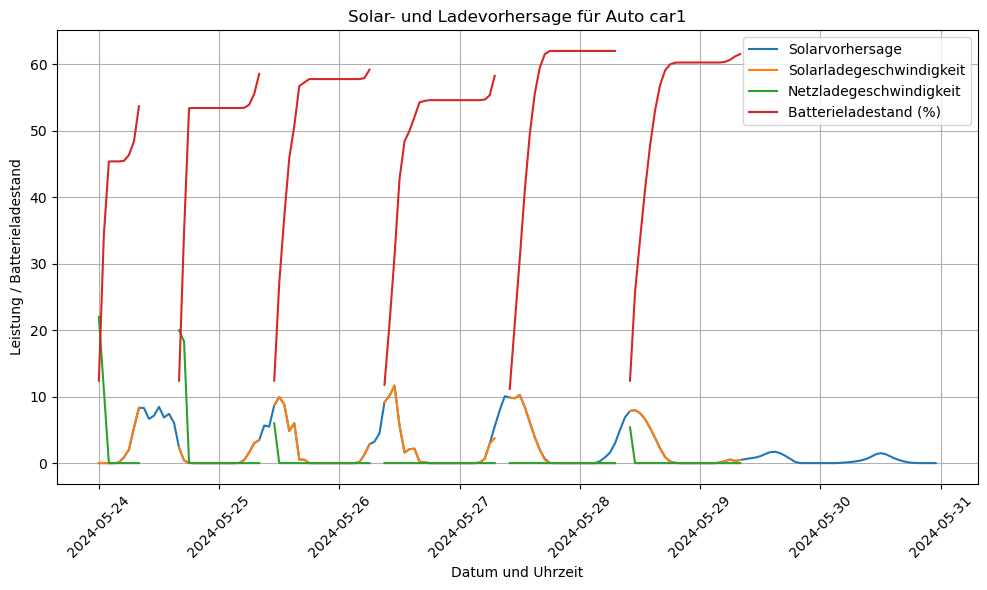

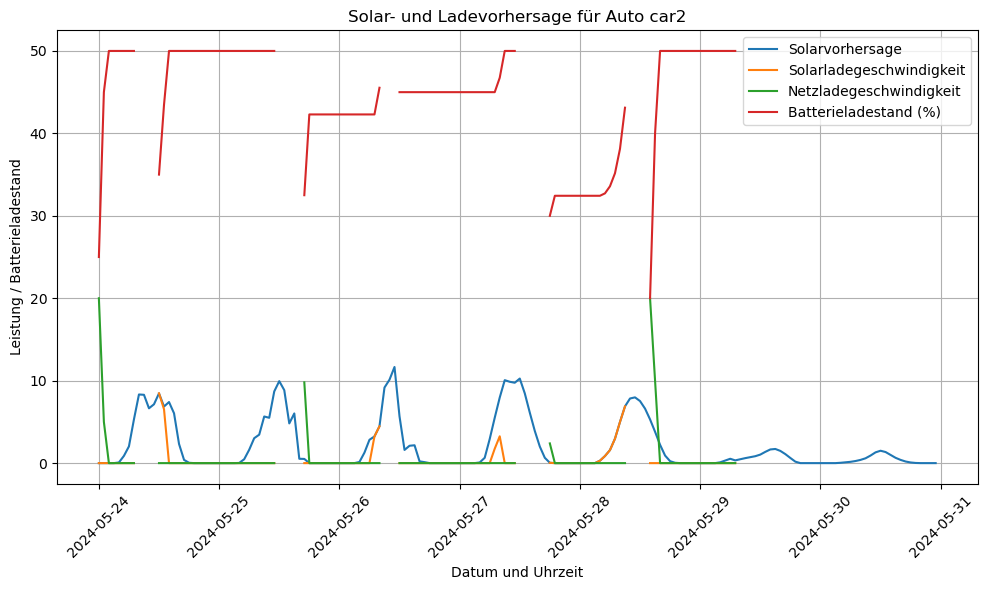

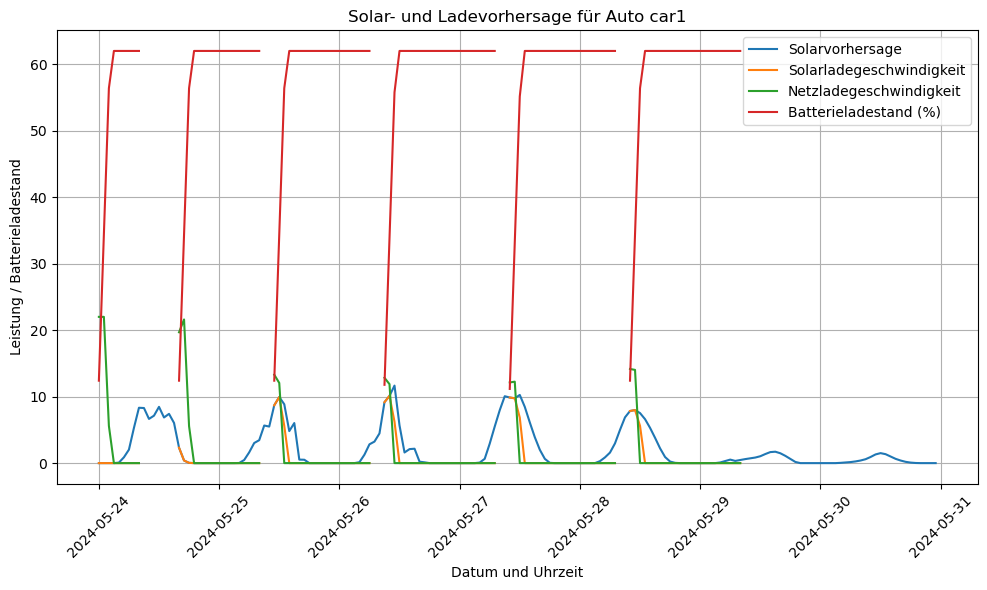

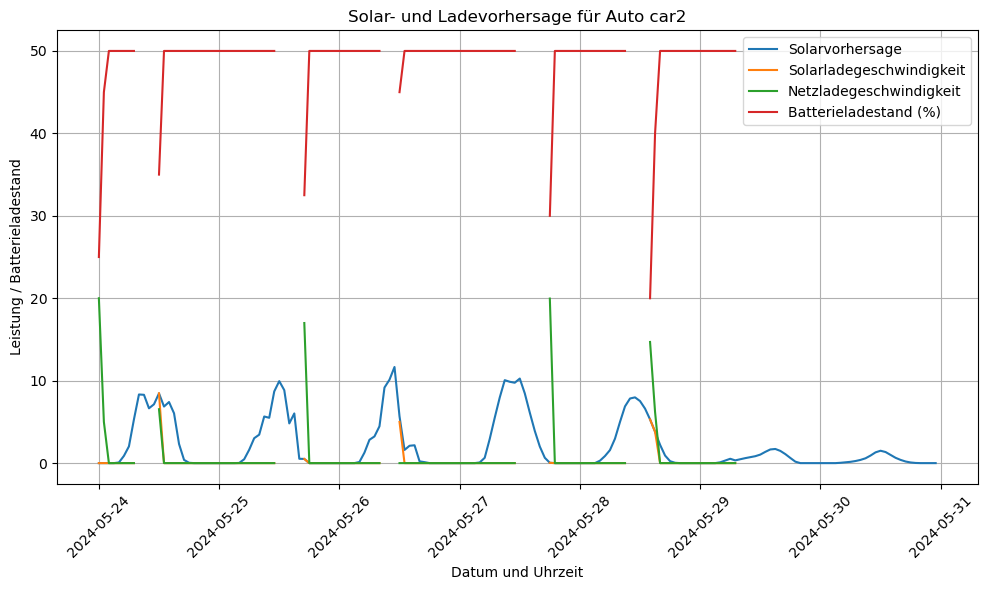

In [16]:
print("Vergleich SolarPower Used (kwh):", data_smart["solarPowerUsed_kwh"], data_simple["solarPowerUsed_kwh"])
print("Vergleich GridPower Used (kwh)", data_smart["gridPowerUsed_kwh"], data_simple["gridPowerUsed_kwh"])
print("Vergleich SolarPower Used (%)", str(data_smart["solarPowerUsed_per"] * 100) + "%", str(data_simple["solarPowerUsed_per"] * 100) + "%")

plot_charging_plan(data_smart)
plot_charging_plan(data_simple)